## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset - use outer merge with study results first
study_merge = pd.merge(study_results,mouse_metadata,how = "outer",on = "Mouse ID")

# Display the data table for preview
study_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice. (unique)
unique_mice = len(study_merge["Mouse ID"].unique())
print(f"There are {unique_mice} mice in the study")

#Control figure for total rows before removing duplicates
study_merge["Mouse ID"].count()


There are 249 mice in the study


1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_merge.sort_values("Mouse ID")

duplicate_list = study_merge[study_merge.duplicated(["Mouse ID", "Timepoint"], keep = False)]

print(duplicate_list[["Mouse ID", "Timepoint", "Tumor Volume (mm3)","Drug Regimen"]])


    Mouse ID  Timepoint  Tumor Volume (mm3) Drug Regimen
860     g989          0           45.000000     Propriva
861     g989          0           45.000000     Propriva
862     g989          5           48.786801     Propriva
863     g989          5           47.570392     Propriva
864     g989         10           51.745156     Propriva
865     g989         10           49.880528     Propriva
866     g989         15           51.325852     Propriva
867     g989         15           53.442020     Propriva
868     g989         20           55.326122     Propriva
869     g989         20           54.657650     Propriva


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_data = study_merge.drop_duplicates(subset = ("Mouse ID", "Timepoint"), keep = "last")

unique_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
# Checking the number of mice in the clean DataFrame.
unique_mice_check = len(unique_data["Mouse ID"].unique())

print(f"There are {unique_mice_check} mice in the study")

#Control figure for total rows after removing duplicates
unique_data["Mouse ID"].count()

There are 249 mice in the study


1888

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_group = unique_data.groupby("Drug Regimen")

tumor_avg = round(regimen_group["Tumor Volume (mm3)"].mean(),2)
tumor_med = round(regimen_group["Tumor Volume (mm3)"].median(),2)
tumor_var = round(regimen_group["Tumor Volume (mm3)"].var(),2)
tumor_std = round(regimen_group["Tumor Volume (mm3)"].std(),2)
tumor_sem = round(regimen_group["Tumor Volume (mm3)"].sem(),2)

regimen_summary = pd.DataFrame({"Average":tumor_avg,"Median":tumor_med,"Variance":tumor_var,"Std. Deviation":tumor_std,
                               "Std. Error":tumor_sem})
regimen_summary

,Average,Median,Variance,Std. Deviation,Std. Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.38,50.78,43.22,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

regimen_group = unique_data.groupby("Drug Regimen")

round(regimen_group["Tumor Volume (mm3)"].describe(),2)

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.68,4.99,23.34,37.69,41.56,45.00,48.16
Ceftamin,178.0,52.59,6.27,45.00,47.21,51.78,56.80,68.92
Infubinol,178.0,52.88,6.57,36.32,47.31,51.82,57.31,72.23
Ketapril,188.0,55.24,8.28,45.00,48.23,53.70,60.87,78.57
Naftisol,186.0,54.33,8.13,45.00,47.29,52.51,59.96,76.67
Placebo,181.0,54.03,7.82,45.00,47.46,52.29,59.92,73.21
Propriva,156.0,52.38,6.57,45.00,47.05,50.78,56.49,72.46
Ramicane,228.0,40.22,4.85,22.05,36.67,40.67,45.00,47.62
Stelasyn,181.0,54.23,7.71,45.00,48.05,52.43,58.72,75.12


## Bar and Pie Charts

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.



TypeError: unhashable type: 'numpy.ndarray'

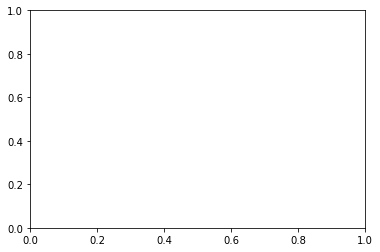

In [46]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

drugs = regimen_group["Drug Regimen"]
mice = regimen_group["Mouse ID"].unique()

plt.bar(drugs, mice, color="c", alpha = 0.5, align="center")

plt.title("Drug Regimen Participant Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.xticks(rotation = "vertical")

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_group = unique_data.groupby("Sex")

count = sex_group["Mouse ID"].nunique()


Text(0.5, 1.0, 'Test Subjects by Sex')

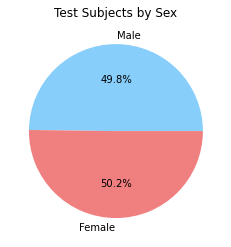

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
colors = ["lightskyblue","lightcoral"]
plt.pie(count,labels = labels,colors = colors,autopct = "%1.1f%%")
plt.title("Test Subjects by Sex")


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. Start for loop here, 
#looping through treatments list

    
    # Locate the rows which contain mice on each drug and get the tumor volumes (.loc)
    
    
    # add subset - add to empty list
    
    
    # Determine outliers using upper and lower bounds - calculate using series
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
